<a href="https://colab.research.google.com/github/abel-keya/Moringa_Data_Science_Core_W4_Independent_Project_Abel_Keya/blob/master/Moringa_Data_Science_Core_W4_Independent_Project_Abel_Keya_Cluster_Sampling_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the libraries we will need 

# Let's start by importing the necessary librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles of all graphs to Seaborn one
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans


In [3]:
AutolibDatasetGlossary
#DESCRIPTION
#State Employee Pay
#SUMMARY
#This dataset is a listing of all current state employees excluding sworn law enforcement officers. Current employees are defined as employees paid in the last 30 days. The following fields are included in the dataset: Agency, Agency Division, Employee Name, Position Title, Period Pay Rate, and YTD Gross Pay. This list is updated on a weekly basis.

#Source: https://data.illinois.gov/dataset/724state_employee_pay
#Last updated at https://data.illinois.gov/dataset : 2019-12-08
urlx= "http://bit.ly/DSCoreAutolibDatasetGlossary"
Glossary=pd.read_excel(urlx)
Glossary

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [6]:
#AutolibDataset
#DESCRIPTION
#State Employee Pay
#SUMMARY
#This dataset is a listing of all current state employees excluding sworn law enforcement officers. Current employees are defined as employees paid in the last 30 days. The following fields are included in the dataset: Agency, Agency Division, Employee Name, Position Title, Period Pay Rate, and YTD Gross Pay. This list is updated on a weekly basis.

#Source: https://data.illinois.gov/dataset/724state_employee_pay
#Last updated at https://data.illinois.gov/dataset : 2019-12-08
url= "http://bit.ly/DSCoreAutolibDataset"
Autolib=pd.read_csv(url)
Autolib

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [7]:
# Getting to know more about the dataset by accessing its information
# 
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


Cleaning our Dataset

In [8]:
Autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


Accuracy 

In [9]:
# Checking if there is any missing value across each column
Autolib.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [10]:
# Checking how many missing values there are across each column
# 
Autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [11]:
# Or we can do a quick check to see if we have any missing values at all
# 
print(Autolib.isnull().values.any())

False


In [12]:
# We might also want to get a total count of missing values
print(Autolib.isnull().sum().sum())

0


Consitency

In [14]:
#Duplicates are data points that are repeated in your dataset. 
# These should be simply removed.
Autolib.duplicated()
df1=Autolib.duplicated()
df1



0        False
1        False
2        False
3        False
4        False
         ...  
16080    False
16081    False
16082    False
16083    False
16084    False
Length: 16085, dtype: bool

In [15]:
df1.sum()

0

Uniformity

In [16]:
#Removing space between column names
Autolib.columns = Autolib.columns.str.replace(' ', '').str.replace('_', '')
Autolib

,Postalcode,date,ndailydatapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Utilibtakensum,Utilibreturnedsum,Utilib14takensum,Utilib14returnedsum,Slotsfreedsum,Slotstakensum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [0]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
Autolib['Postalcode'] = lb_make.fit_transform(Autolib['Postalcode'])
Autolib['date'] = lb_make.fit_transform(Autolib['date'])
Autolib['daytypen'] = lb_make.fit_transform(Autolib['daytype'])

In [25]:
autolibfinal=Autolib[['Postalcode','date','ndailydatapoints','dayOfWeek','daytype','BlueCarstakensum','BlueCarsreturnedsum','Slotsfreedsum','Slotstakensum']]
autolibfinal

,Postalcode,date,ndailydatapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Slotsfreedsum,Slotstakensum
0,0,0,1440,0,weekday,110,103,22,20
1,0,11,1438,1,weekday,98,94,23,22
2,0,22,1439,2,weekday,138,139,27,27
3,0,25,1320,3,weekday,104,104,25,21
4,0,26,1440,4,weekday,114,117,18,20
...,...,...,...,...,...,...,...,...,...
16080,103,143,1440,4,weekday,15,10,0,0
16081,103,144,1440,5,weekend,19,19,0,0
16082,103,145,1440,6,weekend,33,35,0,0
16083,103,146,1440,0,weekday,11,14,0,0


In [26]:
autolibfinal['Postalcode'].unique

<bound method Series.unique of 0          0
1          0
2          0
3          0
4          0
        ... 
16080    103
16081    103
16082    103
16083    103
16084    103
Name: Postalcode, Length: 16085, dtype: int64>

**Plotting the Data**

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


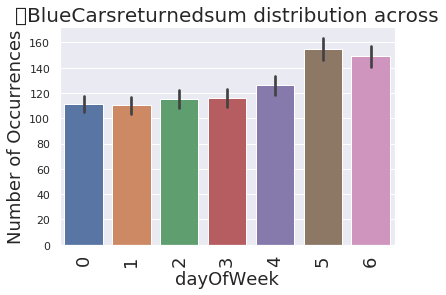

In [40]:
import matplotlib.pyplot as plt
% matplotlib inline
# Create a scatter plot using the 'Agency' and 'EmployeeName'
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
autolibfinal_sum = autolibfinal['BlueCarsreturnedsum'].sum()
sns.set(style="darkgrid")
sns.barplot(autolibfinal['dayOfWeek'], autolibfinal['BlueCarsreturnedsum'], alpha=1.0)
plt.title('	BlueCarsreturnedsum distribution across',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('dayOfWeek', fontsize=18)
plt.figsize=(40,150)
plt.xticks(rotation=90,fontsize=18)
plt.show()


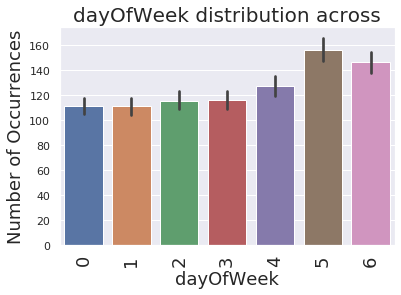

In [42]:
import matplotlib.pyplot as plt
% matplotlib inline
# Create a scatter plot using the 'Agency' and 'EmployeeName'
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
autolibfinal_sum = autolibfinal['BlueCarstakensum'].sum()
sns.set(style="darkgrid")
sns.barplot(autolibfinal['dayOfWeek'], autolibfinal['BlueCarstakensum'], alpha=1.0)
plt.title('dayOfWeek distribution across',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('dayOfWeek', fontsize=18)
plt.figsize=(40,150)
plt.xticks(rotation=90,fontsize=18)
plt.show()

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline
# Create a scatter plot using the 'Agency' and 'EmployeeName'
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
autolibfinal_count = autolibfinal['daytype'].value_counts()
sns.set(style="darkgrid")
sns.barplot(autolibfinal_count.index, autolibfinal_count.values, alpha=1.0)
plt.title('daytype distribution across',fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=8)
plt.xlabel('daytype', fontsize=12)
plt.figsize=(20,80)
plt.xticks(rotation=90,fontsize=5)
plt.show()

In [0]:
#Since we want to cluster our dataset depending on location, we are going to extract the Agency and Employee name and use them as our input while clustering
# To achieve this we will use panda's method .iloc to slice the columns we want from the dataset.
# The first argument of this method identifies the rows we want to keep
# The second - the columns
# In our case, we want to keep all rows and the 1 and 2 colummn.
# Note: Python column indices start from 0

x = datax.iloc[:, 2:3]

# Check if we got the 1 and 2 column
x

,Agency
0,1
1,0
2,2
3,0
4,0
...,...
113613,31
113614,31
113615,31
113616,31


**Clusteri**ng

In [0]:
# Create an object from the KMeans method we imported from sklearn library
# The argument in the Kmean method indicates the number of clusters we are aiming for. 
# We will use this object for clustering
kmeans = KMeans(10)

# calling the fit method on the object we created and then using our input as x.
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Now that we have performed clustering, we need to obtain the predicted clusters for each observation by using the fit_predict method from sklearn.

# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

# The result is an array containing the predicted clusters. There are 10 clusters .

array([8, 8, 8, ..., 2, 2, 9], dtype=int32)

In [0]:
# Create a copy of the data
data_with_clusters = datax.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters.count

<bound method DataFrame.count of            _id     Id  Agency  ... PeriodPayRate YTDGross Cluster
0            1  29972       1  ...          3600     7200       8
1            2  62379       0  ...           400     6000       8
2            3  90108       2  ...          8600     8200       8
3            4  58565       0  ...          2200    38100       8
4            5  67109       0  ...           300     9300       8
...        ...    ...     ...  ...           ...      ...     ...
113613  113614  77066      31  ...           500    95000       2
113614  113615  94640      31  ...           100    73400       2
113615  113616  11114      31  ...           100      900       2
113616  113617  99032      31  ...          1400    62300       2
113617  113618  72504      55  ...           100      100       9

[113618 rows x 9 columns]>

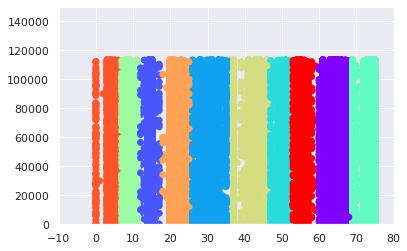

In [0]:
# Plot the data 
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Agency'],data_with_clusters['Id'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-10,80)
plt.ylim(0,150000)
plt.show()